In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style('darkgrid')
df=pd.read_csv('/content/drive/MyDrive/Essential pdf for Interviews /gtd.csv',encoding='latin1')

/tmp/ipython-input-2218788854.py:2: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Essential pdf for Interviews /gtd.csv',encoding='latin1')


In [7]:
print('dataset have',df.shape[0],'rows and',df.shape[1],'colms')
df.head()

dataset have 181691 rows and 135 colms


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [9]:
df=df[['iyear','imonth','iday','country_txt','region_txt','provstate','city','attacktype1_txt','targtype1_txt','gname','weaptype1_txt','nkill','nwound']]


In [10]:
df.rename(columns={
    'iyear': 'Year',
    'imonth': 'Month',
    'iday': 'Day',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'provstate': 'State',
    'city': 'City',
    'attacktype1_txt': 'Attack_Type',
    'targtype1_txt': 'Target_Type',
    'gname': 'Group',
    'weaptype1_txt': 'Weapon_Type',
    'nkill': 'Killed',
    'nwound': 'Wounded'
}, inplace=True) #renaming cols we can use df.rename fn

/tmp/ipython-input-4178105429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [11]:
df.head()

,Year,Month,Day,Country,Region,State,City,Attack_Type,Target_Type,Group,Weapon_Type,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [12]:
#data cleaning
df.isnull().sum()

,0
Year,0
Month,0
Day,0
Country,0
Region,0
State,421
City,435
Attack_Type,0
Target_Type,0
Group,0


In [13]:
df['Killed']=df['Killed'].fillna(0)
df['Wounded']=df['Wounded'].fillna(0)

/tmp/ipython-input-762849823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Killed']=df['Killed'].fillna(0)
/tmp/ipython-input-762849823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wounded']=df['Wounded'].fillna(0)


In [15]:
df['Casualities']=df['Killed']+df['Wounded'] #feature engineering by creating nw col

/tmp/ipython-input-716295806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Casualities']=df['Killed']+df['Wounded'] #feature engineering by creating nw col


/tmp/ipython-input-3140963729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


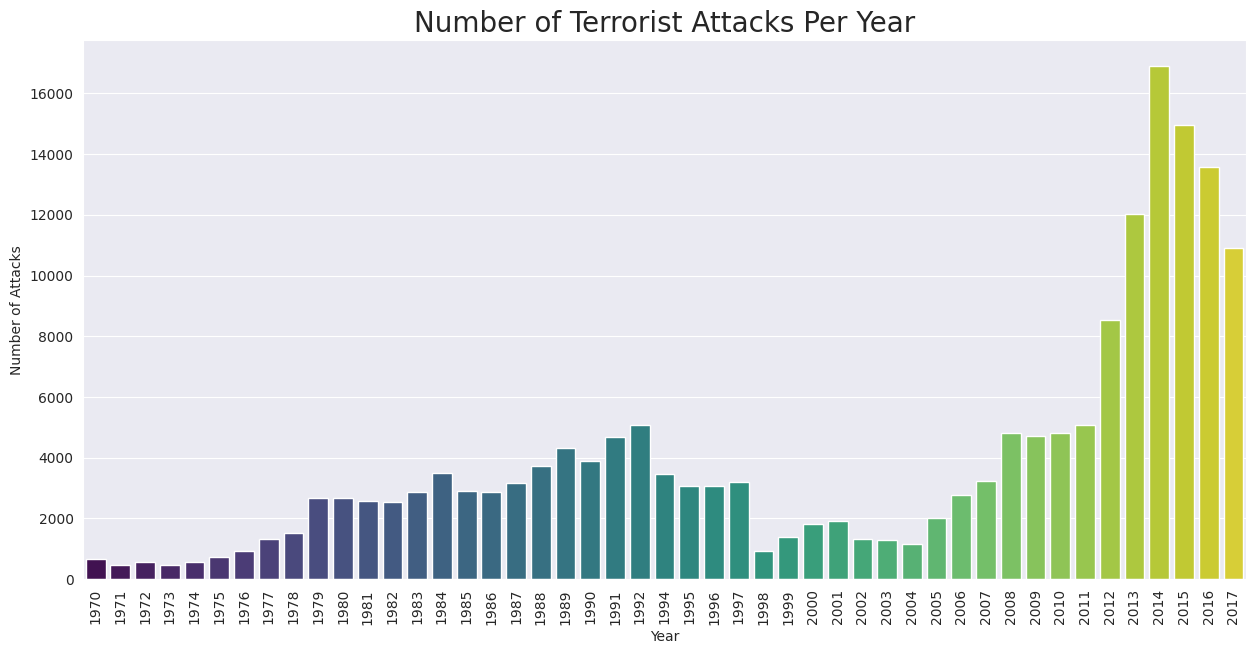

In [16]:
#How has terrorism changed over time?
# Let's create a plot showing the number of terrorist attacks each year.
plt.figure(figsize=(15, 7)) # Make the plot wider
sns.countplot(x='Year', data=df, palette='viridis')
plt.title('Number of Terrorist Attacks Per Year', fontsize=20)
plt.ylabel('Number of Attacks')
plt.xticks(rotation=90) # Rotate the x-axis labels to prevent overlap
plt.show()

/tmp/ipython-input-894607764.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_regions.index, x=top_regions.values, palette='mako')


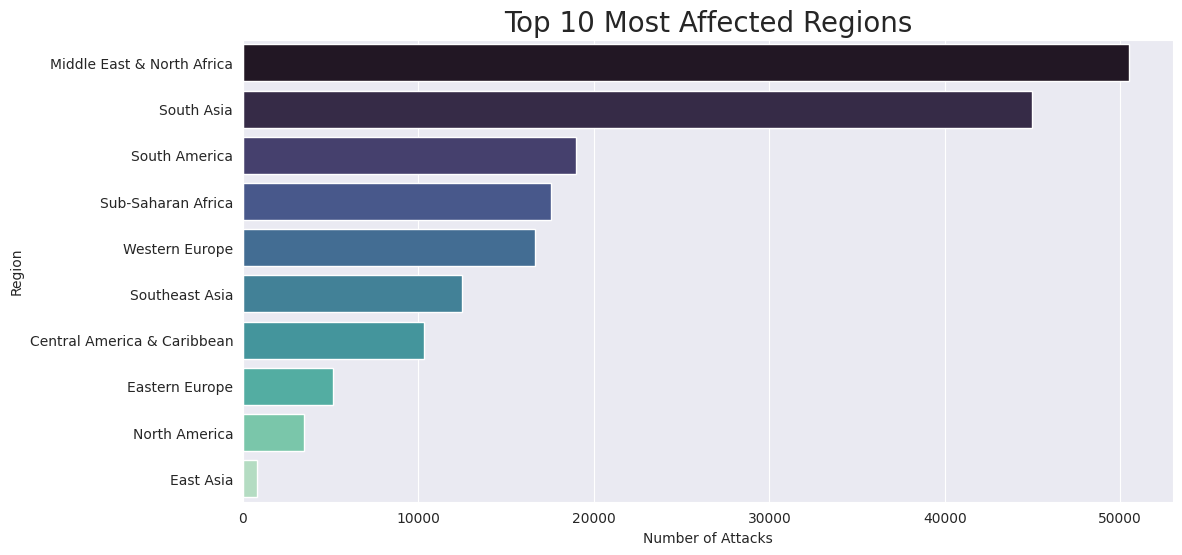

In [17]:
#Which regions are the most affected?
# Let's see the top 10 most affected regions.
top_regions = df['Region'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_regions.index, x=top_regions.values, palette='mako')
plt.title('Top 10 Most Affected Regions', fontsize=20)
plt.xlabel('Number of Attacks')
plt.ylabel('Region')
plt.show()

/tmp/ipython-input-2289223742.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Attack_Type', data=df, order=df['Attack_Type'].value_counts().index, palette='rocket')


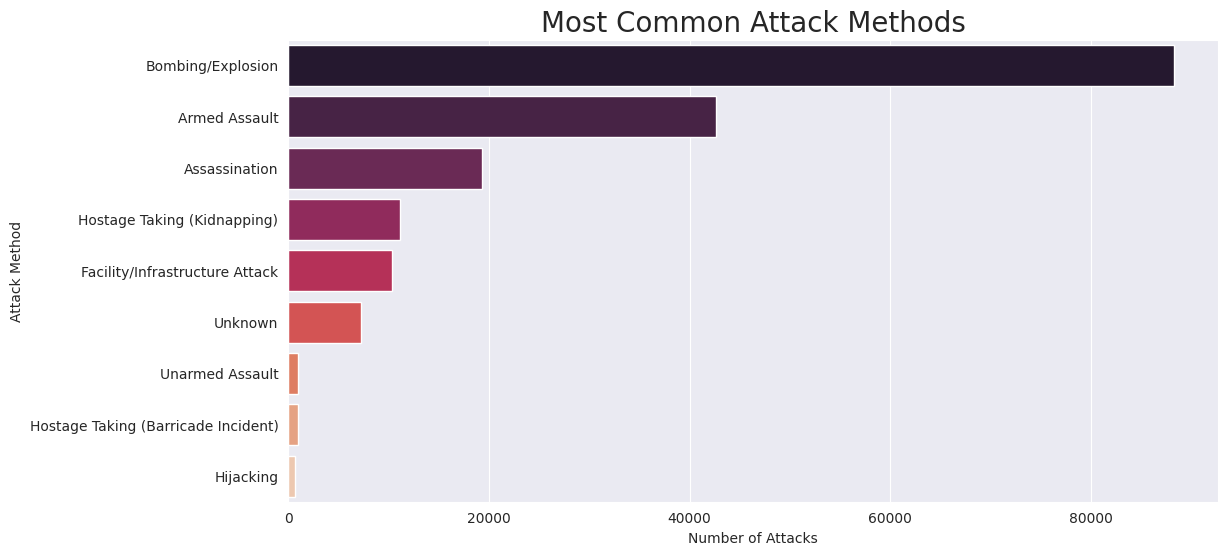

In [18]:
#What are the most common attack methods?
plt.figure(figsize=(12, 6))
sns.countplot(y='Attack_Type', data=df, order=df['Attack_Type'].value_counts().index, palette='rocket')
plt.title('Most Common Attack Methods', fontsize=20)
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Method')
plt.show()

/tmp/ipython-input-2925819268.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_groups.index, x=top_groups.values, palette='crest')


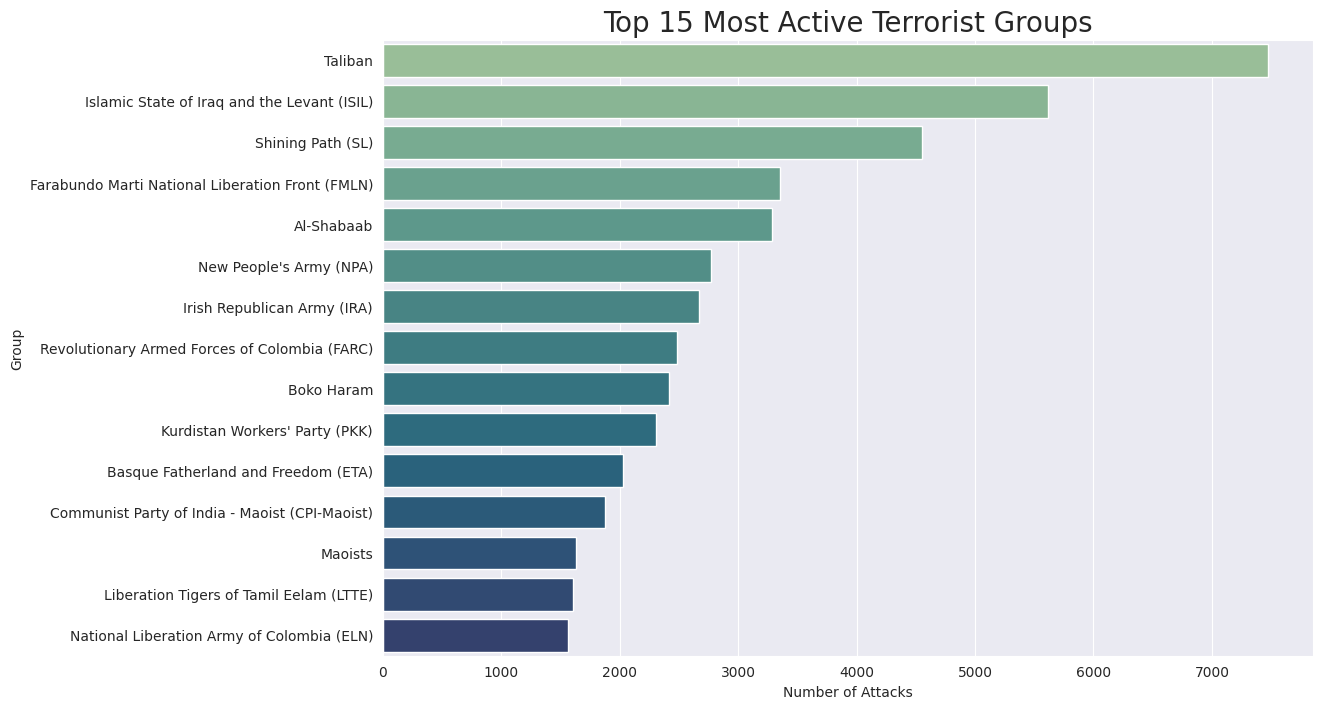

In [19]:
#Who are the most active groups?
# Let's see the top 15 groups, excluding 'Unknown'
top_groups = df[df['Group'] != 'Unknown']['Group'].value_counts().nlargest(15)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_groups.index, x=top_groups.values, palette='crest')
plt.title('Top 15 Most Active Terrorist Groups', fontsize=20)
plt.xlabel('Number of Attacks')
plt.ylabel('Group')
plt.show()